# Pêndulo Simples


## Você deve modificar este notebook para produzir o histograma para o conjunto de dados obtidos com o crônometro digital. Lembre-se que o crônometro digital temos apenas 1 oscilação.

## Este estudo faz parte do curso de Física I Experimental do Instituto de Física da Universidade Federal Fluminense
https://portal.if.uff.br/

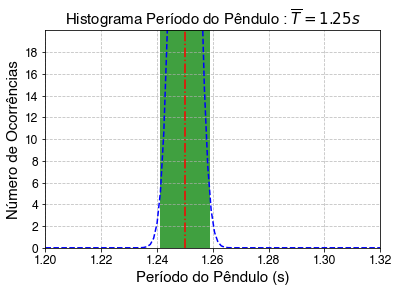

In [1]:
import matplotlib.pyplot as plt # biblioteca para gráficos 
import numpy as np              # biblioteca matemática

####################################################
# definindo fonte
####################################################
hfont = {'fontname':'Helvetica'}

####################################################
# incializando o array data com os valores contidos em data.dat
####################################################
data = np.loadtxt("./data.dat") 
n_osc =  # número de oscilações do pêndulo.

data=data/float(n_osc) # obtendo o período. Caso N_osc > 1

N=len(data) # tamanho do conjunto de dados data.dat
            # a função len da o lenght("comprimento") da lista data

####################################################
# Cálculo da média
####################################################
mu = np.sum(data)/float(N) # np.sum soma todos os valores contidos em data

####################################################
# Resolução do Crônometro 
####################################################
mu = round(mu,2)    # como a resolução do cronômetro manual é 0.01 s
                    # a média deve ter 2 casas decimais.
                    # NOTE QUE PARA O CRÔNOMETRO ELETRONICO A RESOLUÇÃO É DE 0.001s
                    # Quando for utilizar este código altere de maneira apropriada.

####################################################
# Cálculo do desvio padrão
####################################################
soma=0.0
for i in range(N):        # loop por todos os valores de xi
    soma+=(data[i]-mu)**2 # (xi - x_medio)^2

std = np.sqrt(soma/(float(N)-1)) # desvio padrão.

####################################################
# Inicializado o gráfico
####################################################
fig, ax = plt.subplots()

####################################################
# Ajustando detalhes do gráfico
####################################################
# descrição eixo-x
ax.set_xlabel('Período do Pêndulo (s)',fontsize=15,**hfont) 

# descrição eixo-y
ax.set_ylabel('Número de Ocorrências',fontsize=15,**hfont)          

# Título do gráfico
ax.set_title(r'Histograma Período do Pêndulo : $\overline{T}=%.2f s$'%(mu),fontsize=15,**hfont)

# Tamanho e tipo das fontes para o eixo x e y
plt.xticks(fontsize=12, rotation=0,**hfont)
plt.yticks(fontsize=12, rotation=0,**hfont)

####################################################
# Incluindo Grid
####################################################
plt.grid(True,axis='both',alpha=0.8,linestyle="--")
# alpha     - da uma tranparência as linhas
# linestyle - Estilo das linhas. Neste caso tracejada.

####################################################
# Histograma
####################################################
# Lista com a largura dos bins. Notem que no meu caso a largura é de 0.02
# Testem outros valores para ver como o histograma se modifica.
bin_list=[1.20,1.22,1.24,1.26,1.28,1.30,1.32]


####################################################
# Criando o histograma
####################################################

ax.hist(data, bins = bin_list , density=False, facecolor='green',alpha=0.75,rwidth=0.9)
# bins é a lista com os intervalos dos bins
# rwidth é a largura das barras do gráfico. Estou usando 0.9 para evitar
# que as barras fiquem sobrepostas. Testem utilizar 1.0 para ver como fica.

####################################################
# Ajustando detalhes do eixo x
####################################################
xmin = min(bin_list) # mínimo valor da lista de bins
xmax = max(bin_list) # máximo valor da lista de bins

ax.set_xlim(xmin,xmax) # define os limites do eixo x de 1.20 a 1.32

####################################################
# Gráfico de uma Gaussiana
####################################################
# Distribuição Gaussiana : https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_normal


x2 = np.linspace(xmin, xmax, 100)
f = np.exp(-np.square(x2-mu)/(2*np.square(std)))/(std*np.sqrt(2*np.pi))

bin_width = bin_list[1]-bin_list[0] # largura do bin
f = f*(bin_width*N)
# O fator (bin_width*N) converte a gaussiana de uma densidade de probabilidade
# para número de ocorrências assim como o histograma.

ax.plot(x2,f,color="blue",linestyle="--")

####################################################
# Ajustando detalhes do eixo y
####################################################

ax.set_ylim(0,20)                # define os limites do eixo y 0 a 20
ax.set_yticks(np.arange(0,20,2)) # define as divisões do eixo y
                                 # vai de 0 a 20 em incrementos de 2
                                 # 0,2,4,6,...

# a função np.arange(início,fim,incremento) 
# https://numpy.org/doc/stable/reference/generated/numpy.arange.html

####################################################
# Incluindo linha vertical para a média
####################################################
plt.axvline(mu, 0, 1,color="red",linestyle="-.") 

####################################################
# salvando para um arquivo
####################################################
plt. savefig('histograma-pendulo-manual.jpg', dpi=300, bbox_inches='tight')

####################################################
# Mostrando o gráfico
####################################################
plt.show()

